In [8]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

In [9]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
df.index = df.iloc[:,0]

In [11]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [12]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [13]:
df = df.iloc[:,1:5]

In [14]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [15]:
df = df.rename_axis(None, axis=0)

In [16]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [17]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


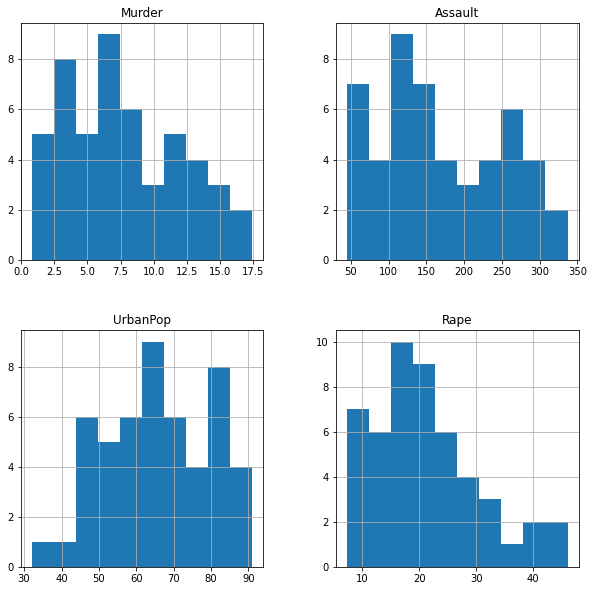

In [20]:
df.hist(figsize = (10,10));

## K-MEANS Model ve Görselleştirme

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [22]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an initialization.

n_init : int, default=10
    Number 

### n_clusters: Çalışmanın başında belirleyeceğimiz küme sayısı
### n_init: Çalışmanın başında belirlenecek merkez sayıları

In [25]:
k_fit = kmeans.fit(df)

In [26]:
k_fit.n_clusters #model nesnesiyle fit ediyoruz

4

In [27]:
k_fit.cluster_centers_ #belirlenen nihai cluster merkezleri. 1.-2.-3.-4. cluster merkezi satır satır

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [28]:
k_fit.labels_
#clusterları belirledik ancak her bir gözlemin hangi sınıf etiketine sahip olduğunu görüyoruz. (bu veri seti için hangi sınıfa hangi eyalete hangi cluster'ı aldığımızı gözlemliyoruz.)

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [29]:
#görsellestirme

In [30]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [31]:
kumeler = k_fit.labels_

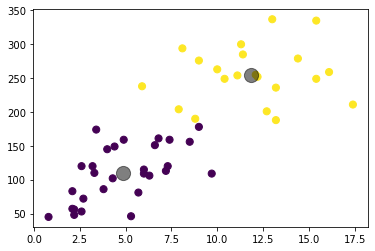

In [32]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

### Yukarda iki değişkeni seçtik bunların sınıflandırmasını ve merkezlerini görüntüledik. 2D oalrak Normalde verimiz 4 değişkenden oluşuyo bunu 2 boyutla göstermenin yolu 2 değişkeni seçip göstermektir. Yukarda yaptığımız gibi ancak bir de PCI uygulayıp (temel bileşen analizi) boyut indirgemesi yaparak sonrasında eksenleri bu şekilde görselleştirebilirdik.

In [47]:
df.iloc[:,0] 

Alabama           13.2
Alaska            10.0
Arizona            8.1
Arkansas           8.8
California         9.0
Colorado           7.9
Connecticut        3.3
Delaware           5.9
Florida           15.4
Georgia           17.4
Hawaii             5.3
Idaho              2.6
Illinois          10.4
Indiana            7.2
Iowa               2.2
Kansas             6.0
Kentucky           9.7
Louisiana         15.4
Maine              2.1
Maryland          11.3
Massachusetts      4.4
Michigan          12.1
Minnesota          2.7
Mississippi       16.1
Missouri           9.0
Montana            6.0
Nebraska           4.3
Nevada            12.2
New Hampshire      2.1
New Jersey         7.4
New Mexico        11.4
New York          11.1
North Carolina    13.0
North Dakota       0.8
Ohio               7.3
Oklahoma           6.6
Oregon             4.9
Pennsylvania       6.3
Rhode Island       3.4
South Carolina    14.4
South Dakota       3.8
Tennessee         13.2
Texas             12.7
Utah       

In [48]:
df.iloc[:,1]

Alabama           236
Alaska            263
Arizona           294
Arkansas          190
California        276
Colorado          204
Connecticut       110
Delaware          238
Florida           335
Georgia           211
Hawaii             46
Idaho             120
Illinois          249
Indiana           113
Iowa               56
Kansas            115
Kentucky          109
Louisiana         249
Maine              83
Maryland          300
Massachusetts     149
Michigan          255
Minnesota          72
Mississippi       259
Missouri          178
Montana           109
Nebraska          102
Nevada            252
New Hampshire      57
New Jersey        159
New Mexico        285
New York          254
North Carolina    337
North Dakota       45
Ohio              120
Oklahoma          151
Oregon            159
Pennsylvania      106
Rhode Island      174
South Carolina    279
South Dakota       86
Tennessee         188
Texas             201
Utah              120
Vermont            48
Virginia  

In [33]:
from mpl_toolkits.mplot3d import Axes3D #bu kümelenmeyi 3D görselleştirme

In [50]:
#!pip install --upgrade matplotlib
#import mpl_toolkits

In [51]:
kmeans = KMeans(n_clusters = 3) #2 clusterlı bir kümeleme yapısı
k_fit = kmeans.fit(df) #fit ettik
kumeler = k_fit.labels_ #kümeleri de aldık
merkezler = kmeans.cluster_centers_ #merkezleri de aldık

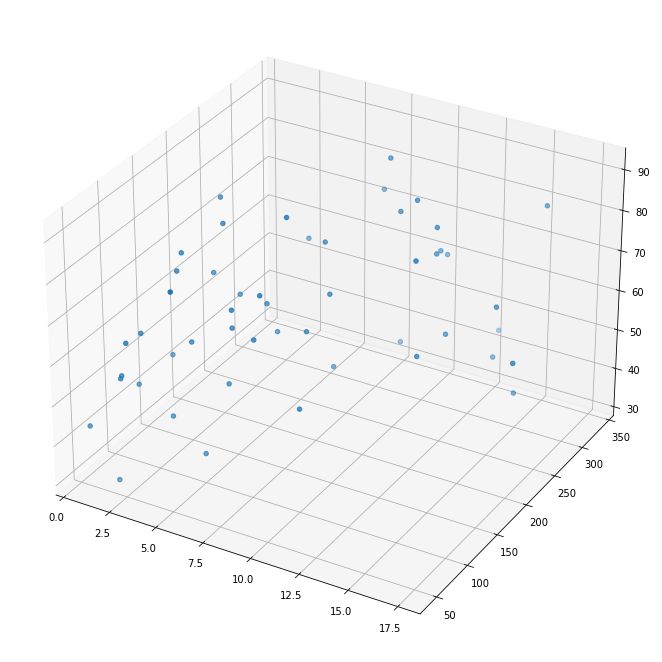

In [52]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

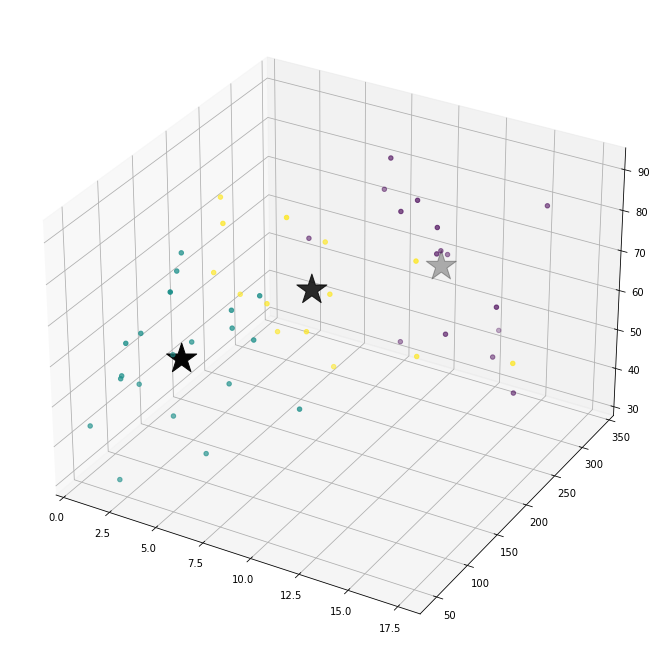

In [37]:
#kümelerein merkezlerini ve kümelenmiş hallerini görselleştiriyoruz 3D olarak. kümeler farklı renkli yıldızlar da merkezleri ifade ediyor. Daha fazla küme olduğunda 
#bunları PCI uygulayıp indirgeyip bu şekilde görselleştirmek daha yararlı olacaktır
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

In [38]:
#kumeler ve gözlem birimleri

In [39]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [40]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]
#amacımız cluster numaraları ve hangi eyaletinhangi cluster'a ait olduğunu göstermek (ilk 10 eyalet için)

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [41]:
df["kume_no"] = kumeler #df içine kalıcı olarak küme numarlarını ekledik

In [42]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [43]:
df["kume_no"] = df["kume_no"] + 1 #videoda 1 yerine 0 yazıyodu 0. küme gibi görünmesini engellemek için bütün kümeler 1 ekledik

In [44]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


# Optimum Kume Sayısının Belirlenmesi

### Kümeler içi benzerliğin max kimeler arası benzerliğin min olması gerekmekte bunun için de optimum küme sayısının belirlenmesi gerekmekte. Bunun için her bir gözlem biriminin içinde bulunduğu kimenin merkezine olan uzaklığının hesaplanması gerekmekte.Bu bütün elemanlar için yapılmakta . Bu da SSD hata karaler uzaklık toplamını diyebiliriz. Bunun sonucunda da kaç küme oması gerektiğini bulmuş oluruz. ^ küme için 5 küme için hata değerlerini bulup buna göre de optimum olanını değerlendiricez en son. Bunun için biz elbow, averagesiluate, getistatistiği yöntemlerden birisi. Biz elbow yöntemini kullanıcaz. "yellowbrick" modülünü yükledik. içinden KElbowVisualizer görselleştirme fonksiyonunu çağırıcaz. 2den 20ye kadar olan değerleri dene elde ettiğin sonuçları görselleştir diyeceğiz. sağda süreyi solda k değerlerine göre elde edilen skorları gösteriyor. Düşük olması iyidir. Küme sayısına yaklaştıkça doğal olarak bu değer 0'a doğru yaklaşır.
### Amaç segmentasyon yapmaksa bunun hakkında bilgimizin olması gerekir. Örneğin burda k 8 çıkmış 8 segment var gibi bi durum çıkıyor ancak normal bir segmentasyon için bu durum çok falza. Ana kıırlımlara bakmak daha mantıklı. Bu yüzden segmentasyon yapılacak alan vve segmentasyon hakkında bilgimizin olması önemlidir.

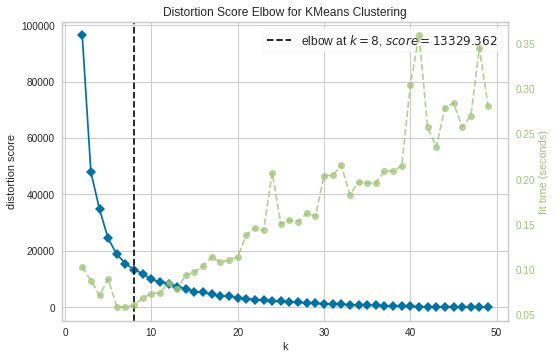

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

In [54]:
#final modeli 
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [57]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]


,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


# Hiyerarşik Kümeleme

### Amacımız eyaletleri belirli suç istatistiklerine göre kümelere ayırmak olacak. Hiyerarşik olmayan K-Means ile değil hiyerarşik bir yöntem olan hiyerarşik kümeleme yöntemi ile ele alacağız.

In [59]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [60]:
from scipy.cluster.hierarchy import linkage #hiyerarşik kümeleme yöntemleri için fonksiyonlarını çağırdık
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [61]:
dir(hc_complete) #hesaplama işlemlerinin gerçekleştirilmiş haline yapılacak işlemleri görebiliriz burdan

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

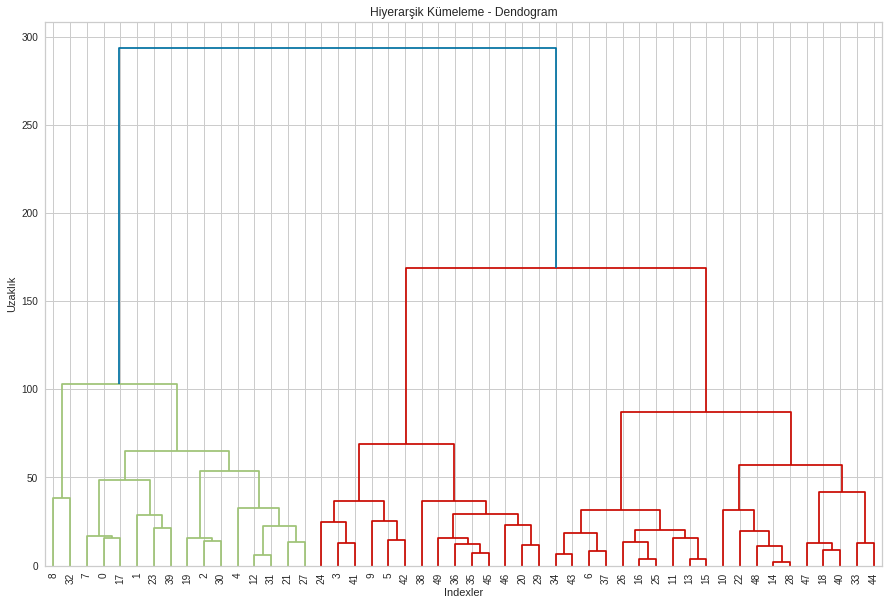

In [62]:
from scipy.cluster.hierarchy import dendrogram #dendogram fonksiyonunu çağırdık

plt.figure(figsize=(15, 10)) #grafik ayarlama kısmı
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram( #dendogram ayarlama kısmı
    hc_complete,
    leaf_font_size=10
);

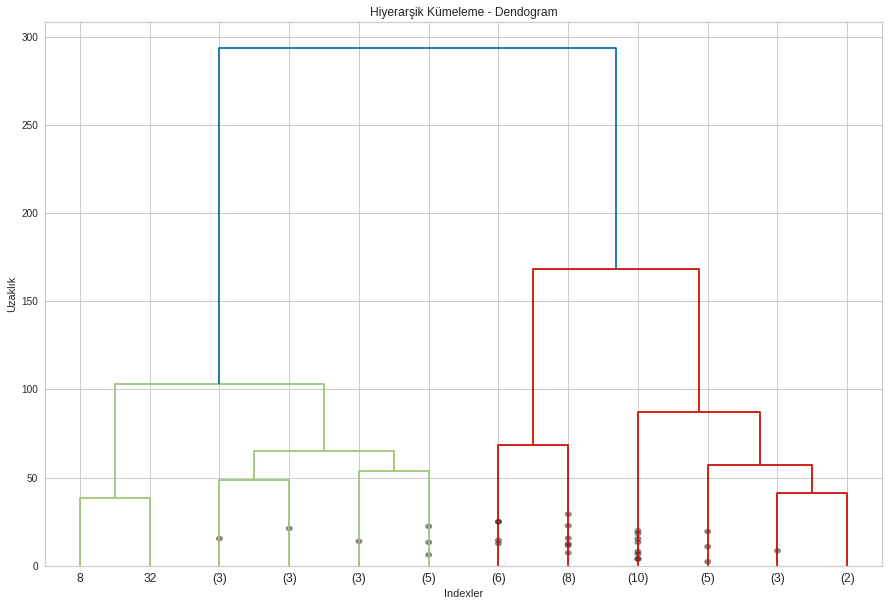

In [71]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,  #bu kısımdan aşağısını gösterilecek ayak sayısına göre ayarladık. trancade ettik. her bacakta kaç eleman olduğunu görüyoruz.
    truncate_mode = "lastp",
    p = 12,
    show_contracted = True
);

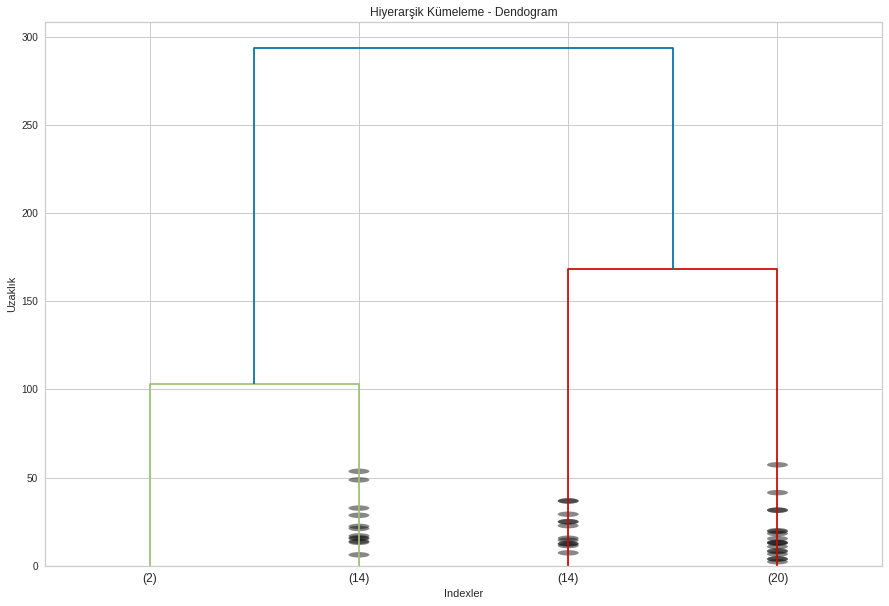

In [63]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

## Optimum Küme Sayısı

### Optimum küme sayısı tespit etme ve optimum sayıya  göre hiyerarşik kümleme yaptığımızda gözlem birimlerini ve hangi kümlere ait oldukları bilgilerine ulaşma işlemini gerçekleştiricez.

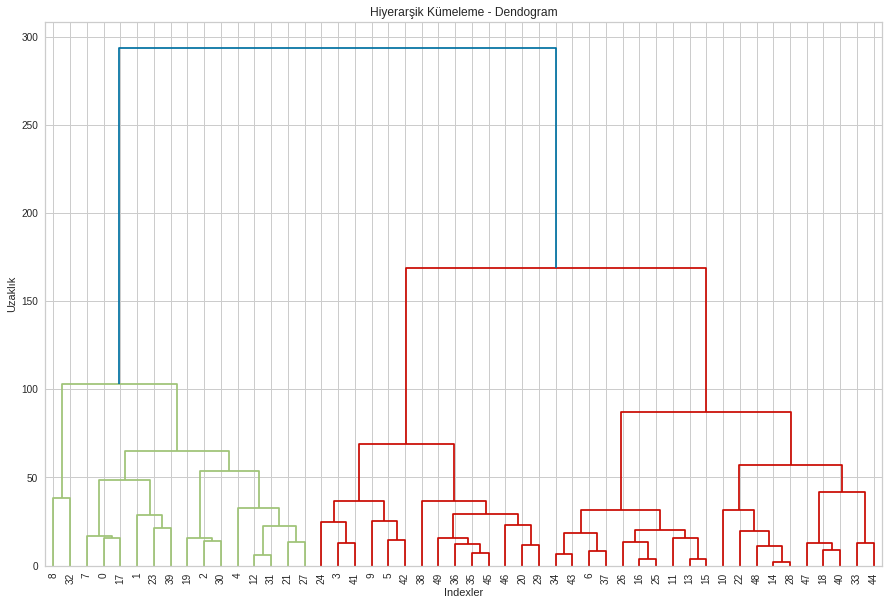

In [64]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10 #en uçtaki(alt) yazıların okunuruluğu boyutunu kontrol eder.
);

In [65]:
?den #yukarda dendogramı den diye tanımlayıp alt bilgilere ulaşmak sitedik ama istediğimiz sonucu vermedi. Aşağıda direkt kendinden sorguladık bu yüzden.

Type:        dict
String form: {'icoord': [[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [65.0, 65 <...>  'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0']}
Length:      5
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [66]:
?dendrogram #bunda da ulaşamasaydık direkt kütüphaneyi yazıp erişebilirdik.

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi

In [67]:
from sklearn.cluster import AgglomerativeClustering #birleştirici kümleme işlemi için cluster modelini kuruyoruz
cluster = AgglomerativeClustering(n_clusters = 4, #gözleme göre 4 cluster ile kuruyoruz
                                  affinity = "euclidean", #uzaklık hesaplama yöntemi olarak öklid
                                  linkage = "ward") #birleştirici hiyerarşik kümeleme methodu olarak yukarda linkage yöntemi de bu tarz bi yöntem

cluster.fit_predict(df) #fit ettik.verilen değerler her bir gözlem biriminin ait olduğu sınıf birimini ifade ediyo.

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [68]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [69]:
df["kume_no"] = cluster.fit_predict(df)

In [70]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# PCA

In [73]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [74]:
from warnings import filterwarnings #filtreleme uyarısını vermeyi önleyen kısım
filterwarnings('ignore')

In [75]:
from sklearn.preprocessing import StandardScaler #PCA yapmak için gerekli olan standardizasyon işlemini yapmak için çağırdığımız fonksiyon

df = StandardScaler().fit_transform(df) #fitleme işlemi yaptık.
df[0:5,0:5]

#standartlaştırma işlemini uyguladık.

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [76]:
from sklearn.decomposition import PCA #PCA fonkunu çağırdık
pca = PCA(n_components = 3) #PCA nesnesini PCA fonkunu kullanarak oluşturduk
pca_fit = pca.fit_transform(df) #dönüştürme işlemini gerçeleştirip bu nesneye gönderdik

In [77]:
bilesen_df = pd.DataFrame(data = pca_fit, #bileşenleri adlandırma işlemini gerçekleştiriyoruz dataframe olarak aşağıda görüldüğü üzere
                          columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])

In [78]:
bilesen_df.head()
#standartlaştırılmadan önceki hali yukarda 4 değişken vardı ancak burda 3 bileşenle ifade ettik.

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [79]:
pca.explained_variance_ratio_ 

array([0.62006039, 0.24744129, 0.0891408 ])

#### gerçek veri setindeki bilginin ne kadarını taşıdığını görüntülemek için yazılan kısım. ÖNEMLİ!!!!
#1. bileşen 0.62006039 lık kısmını 2. bileşen 0.62006039 lik kısmını 3. bileşen ise 0.0891408 lik kısmını ifade ediyor. bu da tüm bilginin %85-90 arasında ifade edildiğini gösteriyor.

In [80]:
pca = PCA().fit(df) #bileşen sayısını belirtmeden model nesnesi oluşturduk

### Aşağıda ise görsel olarak kümülatif toplama yöntemiyle bileşenlerin eklendikçe genel bilgi taşınabilirliği hakkında bilgi vermesini görüyoruz. 1. bileşen 0.65 iken 2. bileşen eklendiğinde ise 0.87 3.bileşen eklendiğinde 0.95 civarına geldiğini gözlemleyebiliyoruz. 4 değişkenli bi veri setinde 4.  bileşende %100lük kısım taşınmıştır doğal olarak.

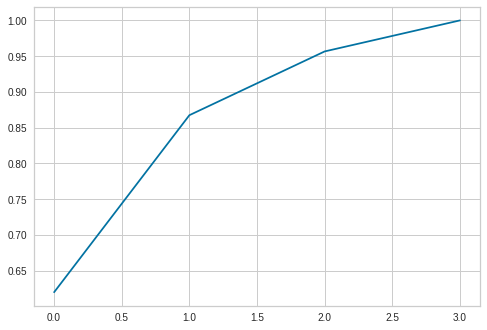

In [81]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#np.cumsum: cumulative summary